# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025 - 2**<br>

# <h1><center>Tablas de notas de enseñanza media </center></h1>

**Integrantes del Proyecto:** Constanza Alarcón, Carla Espinoza, Gaspar Galaz, Renato Reyes.

**Nombre del Profesor**: Rodrigo A. Carrasco.

**Fecha de Segunda Entrega**: 21 de octubre de 2025.

# Introducción:

## Contexto y motivaciones:

- Debido a la emergencia sanitaria generada en 2020 por la enfermedad del Covid-19, los sistemas académicos tuvieron que optar por métodos de enseñanza más complicados para la situación global que se vivía, como lo fueron las clases online. Estas últimas, debido a la espontánea implementación junto a las complicaciones que traía, terminaron por generar alteraciones en el NEM (Notas de Enseñanza Media) de los estudiantes, resultando en una "inflación" en este dato, aunque los puntajes al momento de rendir las pruebas de admisión a la educación superior no cambiaran.
- En este trabajo buscamos demostrar si en realidad hubo esta "alza" en los puntajes NEM durante y post-pandemia, confirmando la influencia de esta, o simplemente fue un incremento proveniente de años anteriores.

## Provenencia de los datos:

- Como recurso se utilizaron las Bases de Datos (BBDD) del proceso de admisión universitaria, proporcionadas por el DEMRE al público en general a través del portal de transparencia: `https://portal-transparencia.demre.cl/portal-base-datos`.

### Aclaraciones de antemano:

Para el desarrollo de este notebook, por favor descargar y colocar en este repositorio la carpeta "data" del siguiente enlace: https://drive.google.com/drive/folders/1ucprBVy6cFvY857yeTfS-m2dqcLpEu_F?usp=sharing (LFS presentó problemas al momento de cargar archivos zip)

### Librerías

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import geopandas as gpd
import copy
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## 1. Lectura de archivos

In [ ]:
df24 = pd.read_csv(os.path.join("..","data","Rendimientos_escolares","rendimientos_escolares_2014-2024", "20250212_Rendimiento_2024_20250131_WEB.csv"), encoding="utf-8", sep=";")
df23 = pd.read_csv(os.path.join("..","data","Rendimientos_escolares","rendimientos_escolares_2014-2024", "20240209_Rendimiento_2023_20240131_WEB.csv"), encoding="utf-8", sep=";")
df22 = pd.read_csv(os.path.join("..","data","Rendimientos_escolares","rendimientos_escolares_2014-2024", "20230209_Rendimiento_2022_20230131_WEB.csv"), encoding="utf-8", sep=";")
df21 = pd.read_csv(os.path.join("..","data","Rendimientos_escolares","rendimientos_escolares_2014-2024", "20220302_Rendimiento_2021_20220131_WEB.csv"), encoding="utf-8", sep=";")
df20 = pd.read_csv(os.path.join("..","data","Rendimientos_escolares","rendimientos_escolares_2014-2024", "20210223_Rendimiento_2020_20210131_WEB.csv"), encoding="utf-8", sep=";")
df19 = pd.read_csv(os.path.join("..","data","Rendimientos_escolares","rendimientos_escolares_2014-2024", "20200220_Rendimiento_2019_20200131_PUBL.csv"), encoding="utf-8", sep=";")
df18 = pd.read_csv(os.path.join("..","data","Rendimientos_escolares","rendimientos_escolares_2014-2024", "20190220_Rendimiento_2018_20190131_PUBL.csv"), encoding="utf-8", sep=";")
df17 = pd.read_csv(os.path.join("..","data","Rendimientos_escolares","rendimientos_escolares_2014-2024", "20180213_Rendimiento_2017_20180131_PUBL.csv"), encoding="utf-8", sep=";")
df16 = pd.read_csv(os.path.join("..","data","Rendimientos_escolares","rendimientos_escolares_2014-2024", "20170216_Rendimiento_2016_20170131_PUBL.csv"), encoding="utf-8", sep=";")
df16.columns = df16.columns.str.upper()
df17.columns = df17.columns.str.upper()



## 2. Limpieza y filtrado de datos

In [22]:
df24.columns

Index(['AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'COD_REG_RBD', 'NOM_REG_RBD_A',
       'COD_PRO_RBD', 'COD_COM_RBD', 'NOM_COM_RBD', 'COD_DEPROV_RBD',
       'NOM_DEPROV_RBD', 'COD_DEPE', 'COD_DEPE2', 'RURAL_RBD', 'ESTADO_ESTAB',
       'NOMBRE_SLEP', 'COD_ENSE', 'COD_ENSE2', 'COD_GRADO', 'LET_CUR',
       'COD_JOR', 'COD_TIP_CUR', 'COD_DES_CUR', 'MRUN', 'GEN_ALU',
       'FEC_NAC_ALU', 'EDAD_ALU', 'COD_REG_ALU', 'COD_COM_ALU', 'NOM_COM_ALU',
       'COD_RAMA', 'COD_SEC', 'COD_ESPE', 'PROM_GRAL', 'ASISTENCIA', 'SIT_FIN',
       'SIT_FIN_R', 'COD_MEN'],
      dtype='object')

In [ ]:
anios = [df16, df17, df18, df19, df20, df21, df22, df23, df24] #no hay datos nulos
for i in anios:
    print(i.isna().sum())


AGNO              0
RBD               0
DGV_RBD           0
NOM_RBD           0
COD_REG_RBD       0
COD_PRO_RBD       0
COD_COM_RBD       0
NOM_COM_RBD       0
COD_DEPROV_RBD    0
NOM_DEPROV_RBD    0
COD_DEPE          0
COD_DEPE2         0
RURAL_RBD         0
ESTADO_ESTAB      0
COD_ENSE          0
COD_ENSE2         0
COD_GRADO         0
LET_CUR           0
COD_JOR           0
COD_TIP_CUR       0
COD_DES_CUR       0
MRUN              0
GEN_ALU           0
FEC_NAC_ALU       0
EDAD_ALU          0
COD_REG_ALU       0
COD_COM_ALU       0
NOM_COM_ALU       0
COD_RAMA          0
COD_SEC           0
COD_ESPE          0
PROM_GRAL         0
ASISTENCIA        0
SIT_FIN           0
SIT_FIN_R         0
dtype: int64
AGNO              0
RBD               0
DGV_RBD           0
NOM_RBD           0
COD_REG_RBD       0
COD_PRO_RBD       0
COD_COM_RBD       0
NOM_COM_RBD       0
COD_DEPROV_RBD    0
NOM_DEPROV_RBD    0
COD_DEPE          0
COD_DEPE2         0
RURAL_RBD         0
ESTADO_ESTAB      0
COD_ENS

In [ ]:
#no hay datos duplicados
for i in anios:
    print(i.duplicated().sum())


0
0
0
0
0
0
0
0
0


### En esta parte se filtran los datos por las columnas de nuestro interes, tanto como generar diversos dataframes con datos en especifico para su futuro trabajo

In [4]:
df = pd.concat([df16, df17, df18, df19, df20, df21, df22, df23, df24])
df_correlaciones = copy.deepcopy(df)
df_correlaciones = df_correlaciones[['AGNO', 'COD_DEPE2', 'RURAL_RBD', 'COD_ENSE2','PROM_GRAL']]
df_correlaciones["PROM_GRAL"] = df_correlaciones["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df = df[["AGNO", "PROM_GRAL", "COD_ENSE2", "COD_GRADO", "COD_DEPE2", "COD_REG_RBD", "NOM_COM_RBD"]]
df["PROM_GRAL"] = df["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df_tec = df[df['COD_ENSE2'] == 7]
df_hc = copy.deepcopy(df)
df = df[df["COD_ENSE2"] == 5]
df = df[df["PROM_GRAL"] != 0]

In [5]:
df_pri = df[df["COD_GRADO"] == 1]
df_sec = df[df["COD_GRADO"] == 2]
df_ter = df[df["COD_GRADO"] == 3]
df_cua = df[df["COD_GRADO"] == 4]

df_municipal = df[df["COD_DEPE2"] == 1]
df_subencionado = df[df["COD_DEPE2"] == 2]
df_particular = df[df["COD_DEPE2"] == 3]

df_rm = df[df["COD_REG_RBD"] == 13]
df24_RM = df_rm[df_rm["AGNO"] == 2024]

In [5]:
df24_RM["NOM_COM_RBD"].value_counts()

NOM_COM_RBD
SANTIAGO               24096
MAIPÚ                  23846
PUENTE ALTO            22506
LA FLORIDA             17214
SAN BERNARDO           12909
LAS CONDES             12375
ÑUÑOA                  11033
PROVIDENCIA            10533
QUILICURA              10351
COLINA                  9553
PEÑALOLÉN               8420
LA CISTERNA             7866
RECOLETA                7269
EL BOSQUE               6708
SAN MIGUEL              6325
MELIPILLA               6024
VITACURA                5675
LA REINA                5515
TALAGANTE               5430
LO BARNECHEA            5389
BUIN                    4942
QUINTA NORMAL           4871
PUDAHUEL                4639
ESTACIÓN CENTRAL        4531
RENCA                   4438
LAMPA                   4391
INDEPENDENCIA           4357
LA PINTANA              4210
PAINE                   4036
PEÑAFLOR                3816
HUECHURABA              3084
MACUL                   3041
LA GRANJA               2921
SAN RAMÓN               2813
PA

# 3) Regresión lineal

- Queremos comparar la diferencia entre los promedios reales y la proyección en un escenario sin pandemia.
- Haremos una regresión lineal para cada grado de la enseñanza media.


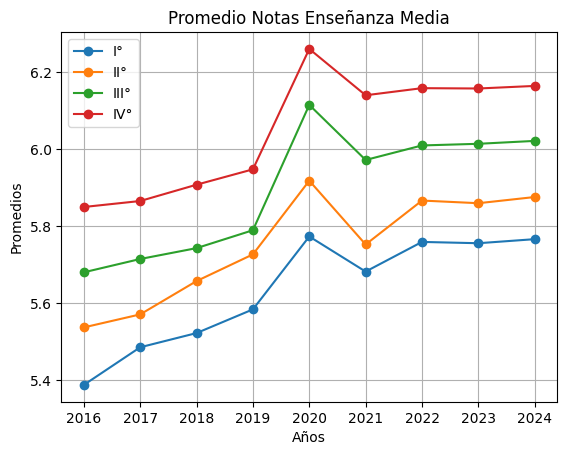

In [8]:
#sacamos el promedio de cada grado de la enseñanza media desde 2016 hasta 2024

anos = ['2016', '2017', '2018', '2019', "2020", "2021", "2022", "2023", "2024"]

promedios1 = []
for i in range(9):
    promedios1.append(df_pri[df_pri["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios2 = []
for i in range(9):
    promedios2.append(df_sec[df_sec["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios3 = []
for i in range(9):
    promedios3.append(df_ter[df_ter["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios4 = []
for i in range(9):
    promedios4.append(df_cua[df_cua["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

plt.plot(anos, promedios1, marker='o', label='I°')
plt.plot(anos, promedios2, marker='o', label='II°')
plt.plot(anos, promedios3, marker='o', label='III°')
plt.plot(anos, promedios4, marker='o', label='IV°')
plt.legend()
plt.ylabel("Promedios")
plt.xlabel("Años")
plt.title("Promedio Notas Enseñanza Media")
plt.grid(True)
plt.show()

Notemos que hay un pico muy marcado en 2020, pero no sabemos cuánto cambió, por esta razón entrenaremos los modelos con datos de 2016 a 2019 para ver ese cambio.

# a) I°Medio

In [107]:
X_anos = np.array([2016, 2017, 2018, 2019])
y_promedios = np.array(promedios1[:4]) #queremos entrenarlo antes de la pandemia, hasta el 2019

In [108]:
X = X_anos.reshape(-1, 1)

In [109]:
model = LinearRegression()
model.fit(X, y_promedios) #entrenamos el modelo

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [110]:
anos_post = [2016,2017,2018,2019,2020,2021,2022,2023,2024] #predecimos con años posteriores
anos_post = np.array(anos_post)
anos_post = anos_post.reshape(-1, 1)
y_pred = model.predict(anos_post)

[ 0.01335382 -0.02191951  0.00377758  0.00478812 -0.12206251  0.03178597
  0.01727672  0.08327034  0.1353105 ]


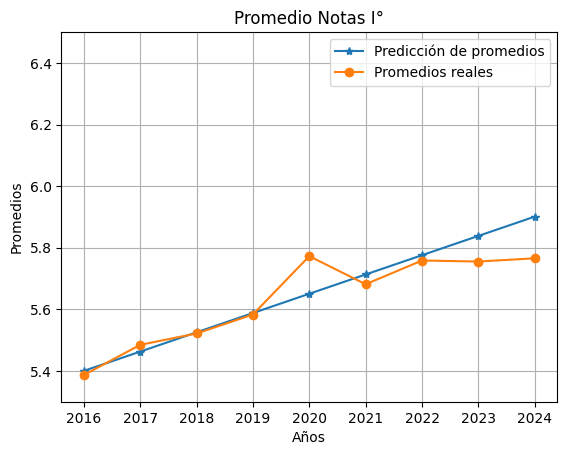

In [113]:
anos_reales = [2016,2017,2018,2019,2020,2021,2022,2023,2024]

diferencia_1 = y_pred - promedios1 # la diferencia
print(diferencia_1)

plt.plot(anos_post, y_pred, marker='*', label='Predicción de promedios')
plt.plot(anos_reales, promedios1, marker='o', label='Promedios reales')
plt.legend()
plt.ylim(5.3, 6.5) # para visualizar mejor los graficos, al comparar
plt.ylabel("Promedios")
plt.xlabel("Años")
plt.title("Promedio Notas I°")
plt.grid(True)
plt.show()

# b) II°Medio

[-0.01239111  0.01938872 -0.00160412 -0.00539349 -0.13131349  0.1001535
  0.05153561  0.12403865  0.1735748 ]


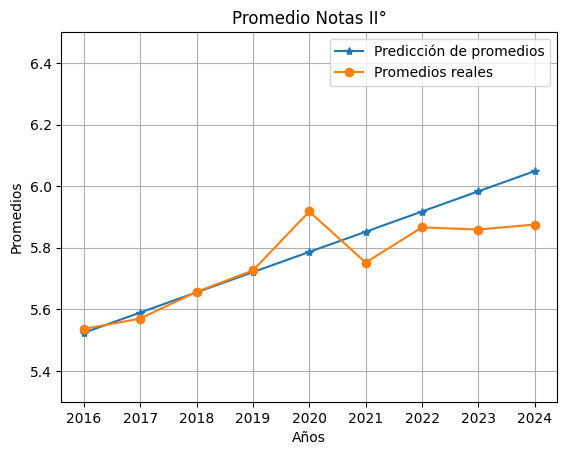

In [115]:
X_anos = np.array([2016, 2017, 2018, 2019])
y_promedios = np.array(promedios2[:4]) #queremos entrenarlo antes de la pandemia, hasta el 2019

X = X_anos.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y_promedios) #entrenamos el modelo

anos_post = [2016,2017,2018,2019,2020,2021,2022,2023,2024] #predecimos con años posteriores
anos_post = np.array(anos_post)
anos_post = anos_post.reshape(-1, 1)
y_pred = model.predict(anos_post)

anos_reales = [2016,2017,2018,2019,2020,2021,2022,2023,2024]

diferencia_2 = y_pred - promedios2 # la diferencia
print(diferencia_2)

plt.plot(anos_post, y_pred, marker='*', label='Predicción de promedios')
plt.plot(anos_reales, promedios2, marker='o', label='Promedios reales')
plt.legend()
plt.ylim(5.3, 6.5) # para visualizar mejor los graficos, al comparar
plt.ylabel("Promedios")
plt.xlabel("Años")
plt.title("Promedio Notas II°")
plt.grid(True)
plt.show()

# c) III°Medio

[-0.00174415 -0.00072158  0.00667562 -0.00420988 -0.29437694 -0.11553936
 -0.11763888 -0.08627642 -0.05817255]


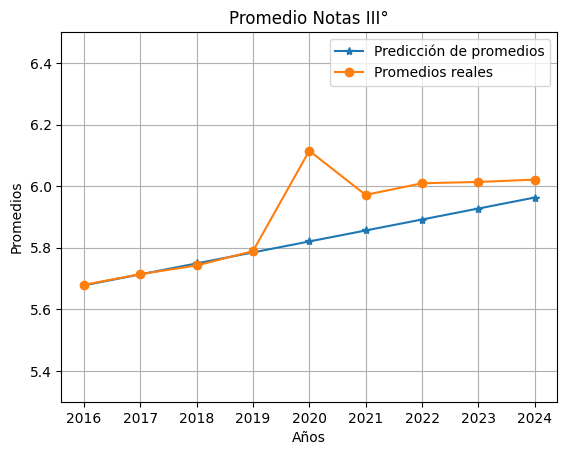

In [116]:
X_anos = np.array([2016, 2017, 2018, 2019])
y_promedios = np.array(promedios3[:4]) #queremos entrenarlo antes de la pandemia, hasta el 2019

X = X_anos.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y_promedios) #entrenamos el modelo

anos_post = [2016,2017,2018,2019,2020,2021,2022,2023,2024] #predecimos con años posteriores
anos_post = np.array(anos_post)
anos_post = anos_post.reshape(-1, 1)
y_pred = model.predict(anos_post)

anos_reales = [2016,2017,2018,2019,2020,2021,2022,2023,2024]

diferencia_3 = y_pred - promedios3 # la diferencia
print(diferencia_3)

plt.plot(anos_post, y_pred, marker='*', label='Predicción de promedios')
plt.plot(anos_reales, promedios3, marker='o', label='Promedios reales')
plt.legend()
plt.ylim(5.3, 6.5) # para visualizar mejor los graficos, al comparar
plt.ylabel("Promedios")
plt.xlabel("Años")
plt.title("Promedio Notas III°")
plt.grid(True)
plt.show()

# d) IV°Medio

[-0.00755488  0.01048363  0.00169738 -0.00462613 -0.28404064 -0.12996532
 -0.11482935 -0.08034598 -0.05343395]


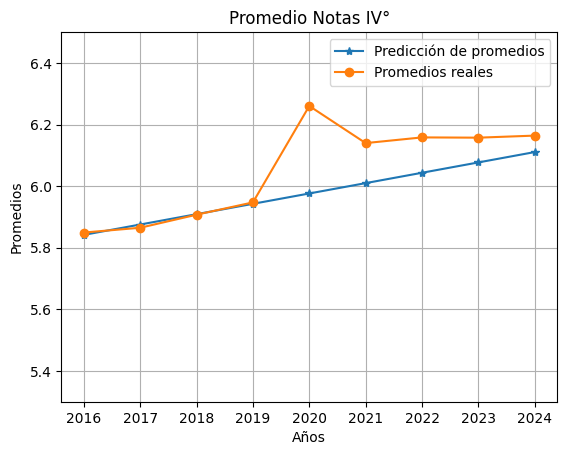

In [117]:
X_anos = np.array([2016, 2017, 2018, 2019])
y_promedios = np.array(promedios4[:4]) #queremos entrenarlo antes de la pandemia, hasta el 2019

X = X_anos.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y_promedios) #entrenamos el modelo

anos_post = [2016,2017,2018,2019,2020,2021,2022,2023,2024] #predecimos con años posteriores
anos_post = np.array(anos_post)
anos_post = anos_post.reshape(-1, 1)
y_pred = model.predict(anos_post)

anos_reales = [2016,2017,2018,2019,2020,2021,2022,2023,2024]

diferencia_4 = y_pred - promedios4 # la diferencia
print(diferencia_4)

# plt.bar(anos_post, diferencia, color='orange', alpha=0.3, label='Diferencia (Predicción - Real)')
plt.plot(anos_post, y_pred, marker='*', label='Predicción de promedios')
plt.plot(anos_reales, promedios4, marker='o', label='Promedios reales')
plt.legend()
plt.ylim(5.3, 6.5) # para visualizar mejor los graficos, al comparar
plt.ylabel("Promedios")
plt.xlabel("Años")
plt.title("Promedio Notas IV°")
plt.grid(True)
plt.show()

# e) Diferencia de las proyecciones y los datos reales en los 4 grados de la enseñanza media en 2020

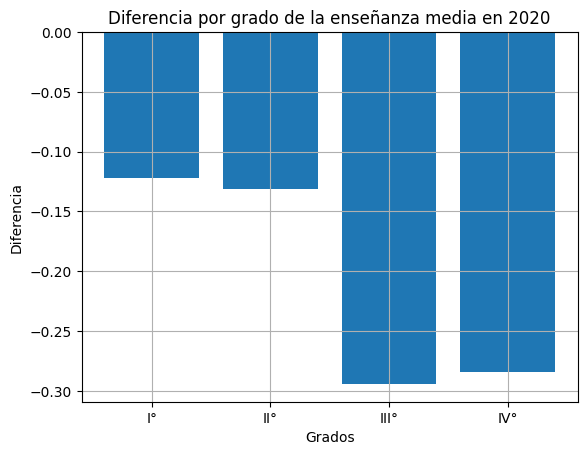

In [120]:
grados = ["I°","II°","III°","IV°"]

diferencia = [diferencia_1[4], diferencia_2[4], diferencia_3[4], diferencia_4[4]]

plt.bar(grados, diferencia)
plt.ylabel("Diferencia")
plt.xlabel("Grados")
plt.title("Diferencia por grado de la enseñanza media en 2020")
plt.grid(True)
plt.show()



Podemos observar que hay especialmente una gran diferencia en los 2 ultimos años, esto también se ve en los gráficos anteriores, podría deberse a la ayuda de maestros para que los alumnos mejoren su ranking y ayudarlos a entrar en la enseñanza superior, aunque estas solo son conjeturas.


# 4) EDA

Tablas: __Promedio general por grado__

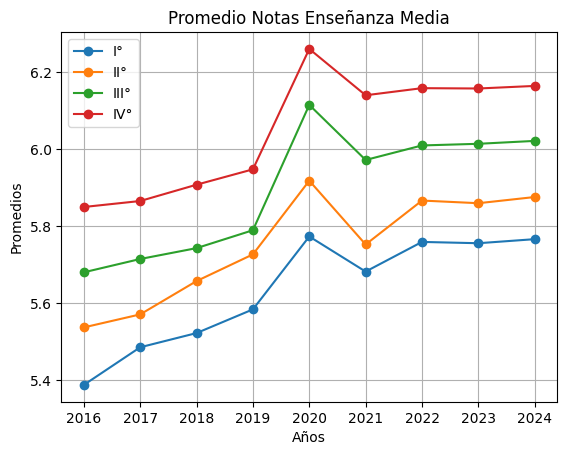

In [9]:
años = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

promedios1 = []
for i in range(9):
    promedios1.append(df_pri[df_pri["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios2 = []
for i in range(9):
    promedios2.append(df_sec[df_sec["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios3 = []
for i in range(9):
    promedios3.append(df_ter[df_ter["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios4 = []
for i in range(9):
    promedios4.append(df_cua[df_cua["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

plt.plot(años, promedios1, marker='o', label='I°')
plt.plot(años, promedios2, marker='o', label='II°')
plt.plot(años, promedios3, marker='o', label='III°')
plt.plot(años, promedios4, marker='o', label='IV°')
plt.legend()
plt.ylabel("Promedios")
plt.xlabel("Años")
plt.title("Promedio Notas Enseñanza Media")
plt.grid(True)
plt.show()

Tablas: __Tipo de establecimiento__

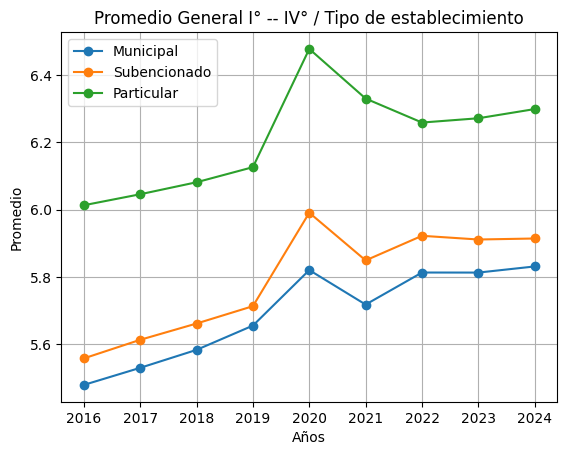

In [ ]:
años = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
promedios_m = []
for i in range(9):
    promedios_m.append(df_municipal[df_municipal["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios_ps = []
for i in range(9):
    promedios_ps.append(df_subencionado[df_subencionado["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios_pp = []
for i in range(9):
    promedios_pp.append(df_particular[df_particular["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

plt.plot(años, promedios_m, marker='o', label='Municipal')
plt.plot(años, promedios_ps, marker='o', label='Subencionado')
plt.plot(años, promedios_pp, marker='o', label='Particular')
plt.title("Promedio General I° - IV° / Tipo de establecimiento")
plt.ylabel("Promedio")
plt.xlabel("Años")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()



## Análisis por comunas de Santiago:

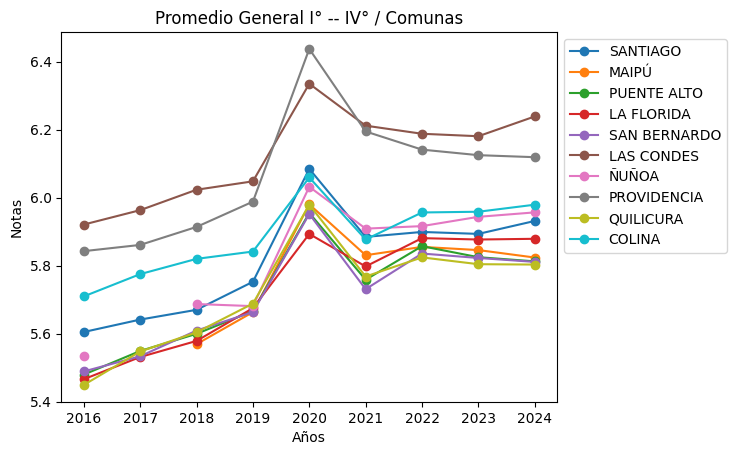

In [ ]:
años = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
comunas = ["SANTIAGO", "MAIPÚ", "PUENTE ALTO", "LA FLORIDA", "SAN BERNARDO", "LAS CONDES", "ÑUÑOA", "PROVIDENCIA", "QUILICURA", "COLINA"]
promedios_c = []
for comuna in comunas:
    x = []
    df_c = df_rm[df_rm["NOM_COM_RBD"] == comuna]
    for i in range(9):
        x.append(df_c[df_c["AGNO"] == 2016 + i]["PROM_GRAL"].mean())
    plt.plot(años, x, marker='o', label=comuna)
plt.legend(bbox_to_anchor=(1,1))
plt.title("Promedio General I° - IV° / Comunas")
plt.ylabel("Notas")
plt.xlabel("Años")
plt.show()


In [9]:
dt = df24_RM["NOM_COM_RBD"].value_counts()
dt = pd.DataFrame(dt)
dt.reset_index(inplace=True)
dt.columns = ['Comuna', 'Cantidad de Establecimientos']
dt.head()

,Comuna,Cantidad de Establecimientos
0,SANTIAGO,24096
1,MAIPÚ,23846
2,PUENTE ALTO,22506
3,LA FLORIDA,17214
4,SAN BERNARDO,12909


In [10]:
gdf = gpd.read_file('Comunas/comunas.shp')
gdf = gdf[gdf['codregion'] == 13]
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 52 entries, 26 to 328
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    52 non-null     int64   
 1   shape_leng  52 non-null     float64 
 2   dis_elec    52 non-null     int32   
 3   cir_sena    52 non-null     int32   
 4   cod_comuna  52 non-null     int32   
 5   codregion   52 non-null     int32   
 6   st_area_sh  52 non-null     float64 
 7   st_length_  52 non-null     float64 
 8   Region      52 non-null     object  
 9   Comuna      52 non-null     object  
 10  Provincia   52 non-null     object  
 11  geometry    52 non-null     geometry
dtypes: float64(3), geometry(1), int32(4), int64(1), object(3)
memory usage: 4.5+ KB


In [11]:
dt['Comuna'] = dt['Comuna'].str.lower()
gdf['Comuna'] = gdf['Comuna'].str.lower()
merged = pd.merge(dt, gdf, on='Comuna')
merged = gpd.GeoDataFrame(merged)
merged.head()

,Comuna,Cantidad de Establecimientos,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Provincia,geometry
0,santiago,24096,333,24644.018619,10,7,13101,13,3.337678e+07,29171.609500,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7864917.074 -3952801.626, -7864220...."
1,maipú,23846,320,61424.982526,8,7,13119,13,1.990876e+08,73734.913427,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7877529.505 -3956422.697, -7877529...."
2,puente alto,22506,292,48961.654840,12,7,13201,13,1.269446e+08,58874.136921,Región Metropolitana de Santiago,Cordillera,"POLYGON ((-7848546.332 -3968052.875, -7848478...."
3,la florida,17214,311,49696.426793,12,7,13110,13,1.025245e+08,59570.561221,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7841285.109 -3960800.595, -7841150...."
4,san bernardo,12909,297,86349.611516,14,7,13401,13,2.227586e+08,103993.594041,Región Metropolitana de Santiago,Maipo,"POLYGON ((-7874973.895 -3983668.273, -7874938...."


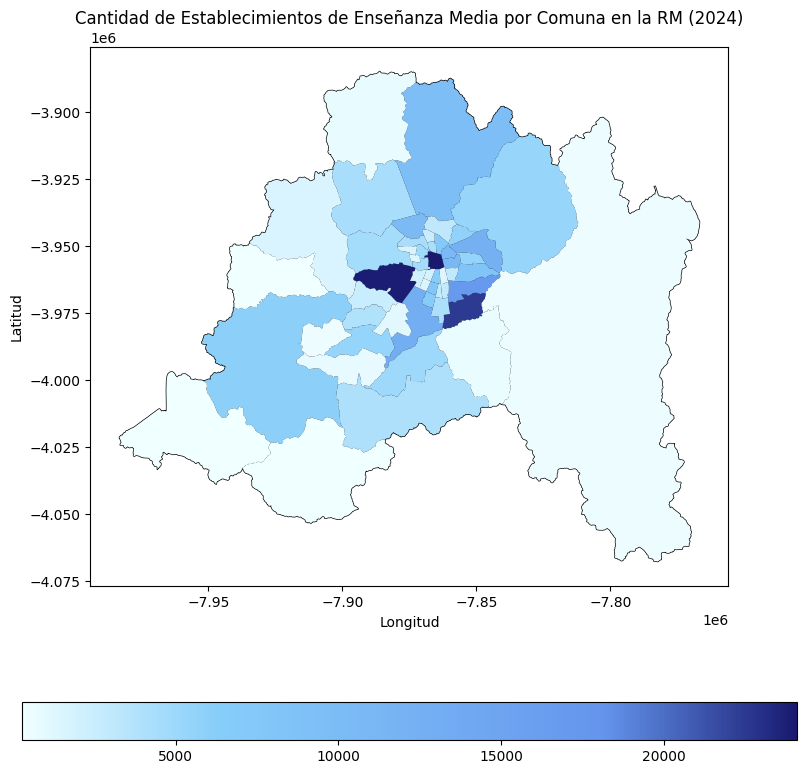

In [12]:
import matplotlib.colors as mcolors
colors = ["azure", "lightskyblue", "cornflowerblue", "midnightblue"]
positions = [0, 0.25,0.75, 1]

custom_cmap = mcolors.LinearSegmentedColormap.from_list("cyclic_cmap", list(zip(positions, colors)))

ax = gdf.plot(figsize=(10, 10), color='white', edgecolor='black')
merged.plot(column='Cantidad de Establecimientos', ax=ax, cmap=custom_cmap, legend=True, legend_kwds={'orientation': "horizontal"})
plt.title("Cantidad de Establecimientos de Enseñanza Media por Comuna en la RM (2024)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


Este último mapa revela un patrón geográfico significativo: la concentración de establecimientos de enseñanza media se localiza predominantemente en la zona centro-oriente de la Región Metropolitana (comunas como Santiago, Providencia y Las Condes), con una presencia mucho menor en las periferias norte y sur. 

**Implicaciones para nuestro análisis de inflación NEM:**

1. **Sesgo geográfico en los datos**: La concentración de establecimientos en zonas de mayor nivel socioeconómico sugiere que los promedios NEM agregados podrían estar influenciados desproporcionadamente por instituciones que tienen mayores recursos y capacidad de implementar políticas flexibles.

2. **Validación de nuestra hipótesis**: El mapa respalda nuestra conclusión de que el aumento en los promedios NEM durante y post-pandemia fue una medida preventiva adoptada principalmente por establecimientos ubicados en zonas urbano-centrales. Estas instituciones, con mayor infraestructura y recursos, fueron las primeras en implementar estrategias para proteger los puntajes de admisión de sus estudiantes frente a la incertidumbre generada por la pandemia.

3. **Disparidad regional**: Las comunas con menor concentración de establecimientos (periferias) enfrentan desafíos mayores de equipamiento e inversión, lo que explica por qué no pudieron implementar de manera uniforme las mismas estrategias de aumento de notas. Esto genera una **inequidad adicional** en el sistema educacional chileno.

# Comparaciones por tipo de enseñanza (Técnicos o Científicos/Humanistas)

## Grafico lineal 2016 - 2024

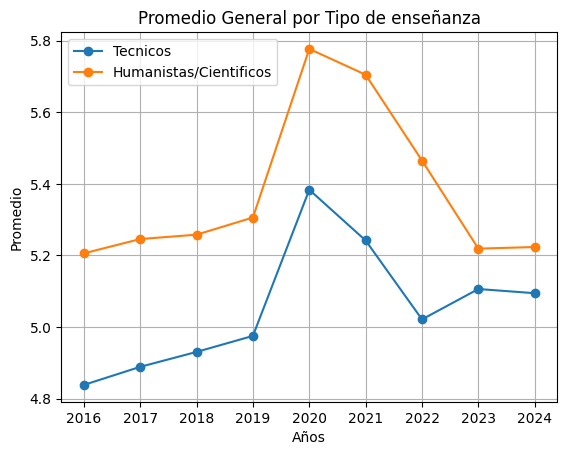

In [ ]:
promedios_tec = []
for i in range(9):
    promedios_tec.append(df_tec[df_tec["AGNO"] == 2016 + i]["PROM_GRAL"].mean())

promedios_hc = []
for i in range(9):
    promedios_hc.append(df_hc[df_hc["AGNO"] == 2016 + i]["PROM_GRAL"].mean())


plt.plot(años, promedios_tec, marker='o', label='Tecnicos')
plt.plot(años, promedios_hc, marker='o', label='Humanistas/Cientificos')
plt.title("Promedio General por Tipo de Enseñanza")
plt.ylabel("Promedio")
plt.xlabel("Años")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

## Gráficos de caja y bigote
### (Para comparar concentración de promedios pre- y post-pandemia)

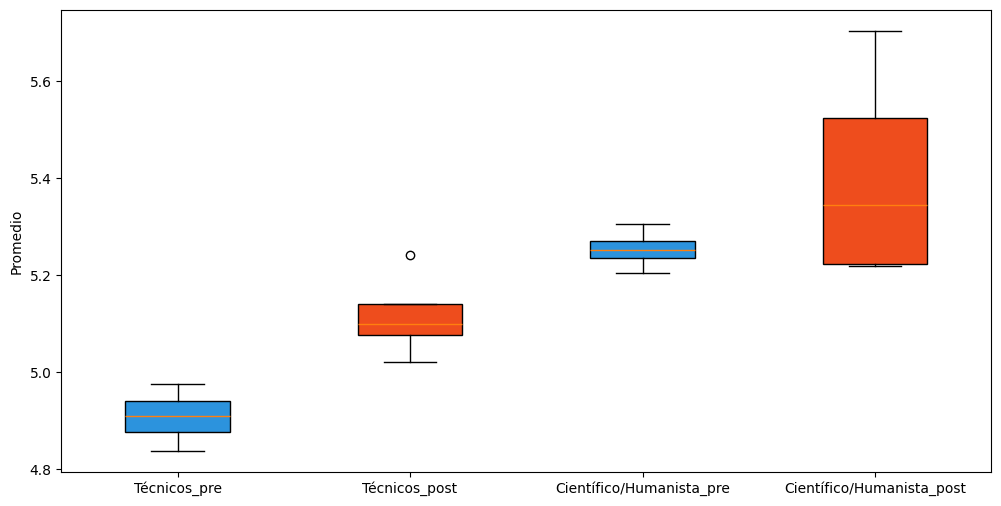

In [ ]:
fig, axs = plt.subplots(figsize=(12, 6))
colores = ['#2c93dd', '#ee4d1d', '#2c93dd', '#ee4d1d']

promedios = [promedios_tec[:4], promedios_tec[5:], promedios_hc[:4], promedios_hc[5:]]
    #pre, post, pre, post

positions=[1, 2, 3, 4]

bplot = axs.boxplot(
    promedios,
    patch_artist=True,
    positions=[1, 2, 3,4])

for patch, color in zip(bplot['boxes'], colores):
    patch.set_facecolor(color)

axs.set_xticks(positions)
axs.set_xticklabels(['Técnicos pre','Técnicos post', 'Científico/Humanista pre', 'Científico/Humanista post'])
axs.set_ylabel('Promedio')

plt.show()

## Tabla comparativa de extremos

In [122]:
min_tec_pre = min(promedios_tec[:4]).round(2)
max_tec_pre = max(promedios_tec[:4]).round(2)
min_hc_pre = min(promedios_hc[:4]).round(2)
max_hc_pre = max(promedios_hc[:4]).round(2)

min_tec_post = min(promedios_tec[5:]).round(2)
max_tec_post = max(promedios_tec[5:]).round(2)
min_hc_post = min(promedios_hc[5:]).round(2)
max_hc_post = max(promedios_hc[5:]).round(2)

arrays = [
    ['Pre-Pandemia'] * 4 + ['Post-Pandemia'] * 4,
    ['Técnico', 'Técnico', 'Científico/Humanista', 'Científico/Humanista'] * 2, 
    ['Min', 'Max', 'Min', 'Max'] * 2  
]
tuplas = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuplas, names=['Periodo', 'Tipo', 'Promedio min/max'])

data = [
    min_tec_pre, max_tec_pre, min_hc_pre, max_hc_pre,
    min_tec_post, max_tec_post, min_hc_post, max_hc_post
]

tabla = pd.DataFrame(data=data, index=index)
tabla.columns = ['Tabla comparativa de extremos']
tabla

Tabla comparativa de extremos
Periodo       Tipo                 Promedio min/max                               
Pre-Pandemia  Técnico              Min                                        4.84
                                   Max                                        4.98
              Científico/Humanista Min                                        5.21
                                   Max                                        5.31
Post-Pandemia Técnico              Min                                        5.02
                                   Max                                        5.24
              Científico/Humanista Min                                        5.22
                                   Max                                        5.70

De esta sección se puede extraer que los tipos de enseñanza tampoco fueron un causante del aumento, debido a que en ambos casos se presentaron la misma tendencia entre ambas inclusive durante la pandemia y posterior.

# Grafico de correlación

<Axes: >

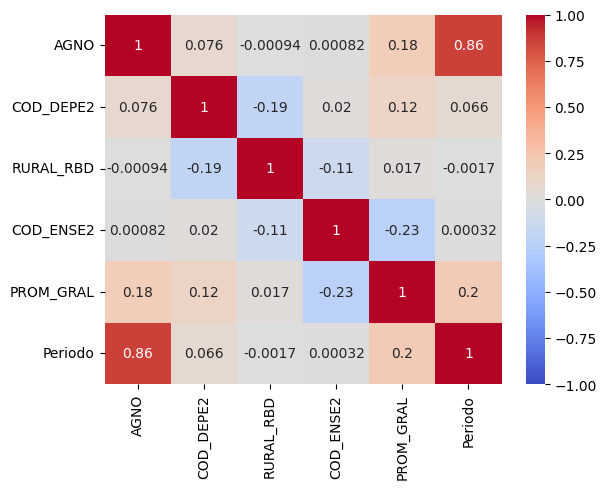

In [26]:
import seaborn as sns

df_correlaciones = df_correlaciones[df_correlaciones["PROM_GRAL"] != 0]
df_correlaciones['Periodo'] = np.where(df_correlaciones['AGNO'] < 2020, 0, 1) # 0 = pre-pandemia, 1 = post-pandemia
promedios = 'PROM_GRAL'
corrs = df_correlaciones.corr(method='spearman')
sns.heatmap(corrs, annot=True, cmap='coolwarm', vmax=1, vmin=-1)


No se presenta una gran correlación entre los datos de años, periodos de pre- o post-pandemia, su dependencia, ruralidad, método de enseñanza o promedio general, esto demostrando que el cambio de notas no se generó por estas características principalmente, lo que aprueba más la teoría de que la pandemia afectó el NEM (esto también al tener la mayor correlación presente en el gráfico sin contar año/periodo).

# Análisis de puntajes en Pruebas de Admisión

In [11]:
ruta_17 = os.path.join("..","data","2017-2024","2017","P.D.A-2017-RENDICION-REGULAR","Rinden_Admisión2017", "ArchivoC_Adm2017.csv")
ruta_18 = os.path.join("..","data", "2017-2024","2018","P.D.A-2018-RENDICION-REGULAR","Rinden_Admisión2018", "ArchivoC_Adm2018.csv")
ruta_19 = os.path.join("..","data", "2017-2024","2019","P.D.A-2019-RENDICION-REGULAR","Rinden_Admisión2019", "ArchivoC_Adm2019.csv")
ruta_20 = os.path.join("..","data", "2017-2024","2020","P.D.A-2020-RENDICION-REGULAR","Rinden_Admisión2020", "ArchivoC_Adm2020.csv")
ruta_21 = os.path.join("..","data", "2017-2024","2021","P.D.A-2021-RENDICION-REGULAR","Rinden_Admisión2021", "ArchivoC_Adm2021.csv")
ruta_22 = os.path.join("..","data", "2017-2024","2022","P.D.A-2022-RENDICION-REGULAR","Rinden_Admisión2022", "ArchivoC_Adm2022.csv")
ruta_23 = os.path.join("..","data", "2017-2024","2023","P.D.A-2023-RENDICION-INVIERNO-REGULAR","Rinden_Admisión2023", "ArchivoC_Adm2023.csv")
ruta_24 = os.path.join("..","data", "2017-2024","2024","P.D.A-2024-RENDICION-INVIERNO-REGULAR","Rinden_Admisión2024", "ArchivoC_Adm2024.csv")

ptj_17 = pd.read_csv(ruta_17, sep=";", usecols=['LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL', 'GRUPO_DEPENDENCIA','RAMA'])
ptj_18 = pd.read_csv(ruta_18, sep=";", usecols=['LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL', 'GRUPO_DEPENDENCIA','RAMA_EDUCACIONAL'])
ptj_19 = pd.read_csv(ruta_19, sep=";", usecols=['LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL', 'GRUPO_DEPENDENCIA','RAMA_EDUCACIONAL'])
ptj_20 = pd.read_csv(ruta_20, sep=";", usecols=['LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL', 'GRUPO_DEPENDENCIA','RAMA_EDUCACIONAL'])
ptj_21 = pd.read_csv(ruta_21, sep=";", usecols=['CLEC_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL', 'GRUPO_DEPENDENCIA','RAMA_EDUCACIONAL'])
ptj_22 = pd.read_csv(ruta_22, sep=";", usecols=['CLEC_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL', 'GRUPO_DEPENDENCIA','RAMA_EDUCACIONAL'])
ptj_23 = pd.read_csv(ruta_23, sep=";", usecols=['CLEC_REG_ACTUAL', 'MATE1_REG_ACTUAL', 'MATE2_REG_ACTUAL','HCSOC_REG_ACTUAL', 'CIEN_REG_ACTUAL','CLEC_INV_ACTUAL', 'MATE_INV_ACTUAL', 
                    'HCSOC_INV_ACTUAL', 'CIEN_INV_ACTUAL','GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_24 = pd.read_csv(ruta_24, sep=";", usecols=['CLEC_REG_ACTUAL', 'MATE1_REG_ACTUAL', 'MATE2_REG_ACTUAL','HCSOC_REG_ACTUAL', 'CIEN_REG_ACTUAL',
                    'CLEC_INV_ACTUAL', 'MATE1_INV_ACTUAL', 'MATE2_INV_ACTUAL','HCSOC_INV_ACTUAL', 'CIEN_INV_ACTUAL','GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])

In [12]:
ptj_17 = ptj_17.rename(columns={'RAMA': 'RAMA_EDUCACIONAL'})
ptj_17 = ptj_17.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_18 = ptj_18.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_19 = ptj_19.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_20 = ptj_20.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_21 = ptj_21.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_22 = ptj_22.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_23 = ptj_23.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])
ptj_24 = ptj_24.dropna(subset=['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'])

In [13]:
ptjes = [ptj_17, ptj_18, ptj_19, ptj_20, ptj_21, ptj_22, ptj_23, ptj_24]
for df in ptjes:
    df['RAMA_EDUCACIONAL'] = df['RAMA_EDUCACIONAL'].apply(lambda x: 0 if str(x).startswith('T') else 1) # 0 = Tecnico, 1 = Humanista/Cientifico

In [14]:
cols = ['LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL']

def promedio_sin_ceros(row, cols):
    valores = row[cols]
    suma = valores[valores != 0].sum()
    cuenta = (valores != 0).sum()                         
    return suma / cuenta if cuenta > 0 else None  

for df in ptjes[:4]:
    df['PROMEDIO_PPTES'] = df.apply(lambda row: promedio_sin_ceros(row, cols), axis=1)
    df['PROMEDIO_PPTES'] = df['PROMEDIO_PPTES'].round(3)

In [15]:
cols = ['CLEC_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL']

ptj_21['PROMEDIO_PPTES'] = ptj_21.apply(lambda row: promedio_sin_ceros(row, cols), axis=1)
ptj_22['PROMEDIO_PPTES'] = ptj_22.apply(lambda row: promedio_sin_ceros(row, cols), axis=1)
ptj_21['PROMEDIO_PPTES'] = ptj_21['PROMEDIO_PPTES'].round(3)
ptj_22['PROMEDIO_PPTES'] = ptj_22['PROMEDIO_PPTES'].round(3)

In [16]:
cols = ['CLEC_REG_ACTUAL', 'MATE1_REG_ACTUAL', 'MATE2_REG_ACTUAL','HCSOC_REG_ACTUAL', 'CIEN_REG_ACTUAL','CLEC_INV_ACTUAL', 'MATE_INV_ACTUAL', 
        'HCSOC_INV_ACTUAL', 'CIEN_INV_ACTUAL','GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL'] 

ptj_23['PROMEDIO_PPTES'] = ptj_23.apply(lambda row: promedio_sin_ceros(row, cols), axis=1)
ptj_23['PROMEDIO_PPTES'] = ptj_23['PROMEDIO_PPTES'].round(3)

cols = ['CLEC_REG_ACTUAL', 'MATE1_REG_ACTUAL', 'MATE2_REG_ACTUAL','HCSOC_REG_ACTUAL', 'CIEN_REG_ACTUAL','CLEC_INV_ACTUAL', 'MATE1_INV_ACTUAL', 
        'MATE2_INV_ACTUAL','HCSOC_INV_ACTUAL', 'CIEN_INV_ACTUAL','GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL']

ptj_24['PROMEDIO_PPTES'] = ptj_24.apply(lambda row: promedio_sin_ceros(row, cols), axis=1)
ptj_24['PROMEDIO_PPTES'] = ptj_24['PROMEDIO_PPTES'].round(3)

<Axes: >

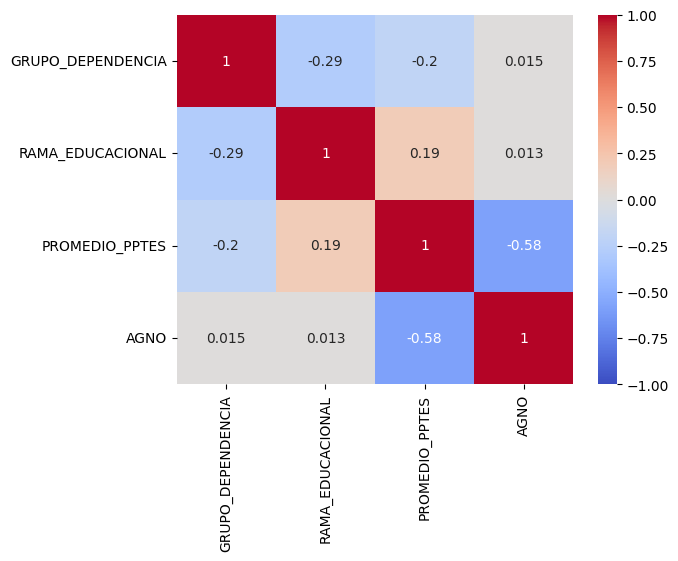

In [27]:
cols_mantenidas = ['GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL', 'PROMEDIO_PPTES']
agnos = list(range(2017, 2025))
df_corr = pd.concat(
    [
        df[cols_mantenidas].assign(AGNO=year)
        for year, df in zip(agnos, ptjes)
    ],
    ignore_index=True
)
corr = df_corr.corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm', vmax=1, vmin=-1)

Finalmente, se puede observar cómo las correlaciones entre los puntajes, la rama educacional, grupos de dependencia o años de los estudiantes no muestran una gran relación entre ellos, siendo la que existe entre año y promedio de puntajes con mayor relevancia en el gráfico presente, demostrando nuevamente cómo estos valores se relacionan debido a la pandemia de manera inversa, comprobando que aunque hayan aumentado los puntajes NEM, los resultados de las pruebas de admisión no reflejan estos aumentos.

# Conclusiones

- Se logra demostrar cómo, a pesar de diversas variables presentes y junto al análisis de varios años con diversos períodos respecto a la pandemia, se muestra una tendencia a que los promedios NEM subieron gracias a esta última y lo que conllevó (como las clases en línea), datos que se contradicen con los resultados de las pruebas de admisión correspondientes al año, concluyendo así que este aumento no significaba un mayor conocimiento por parte del alumnado, sino que fue posiblemente una medida preventiva adoptada por los establecimientos ante la crisis sanitaria y sus años posteriores.